<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Hello again! Sorry for the long time review. You did good fixes, thank you for your work. Good luck in the next project :)
</div>

<b>Reviewer's comment</b>

Hello, Dima! My name is Andrey Isupov. I checked your project. You did a very good job on the project. But there are few things that need fix. I think it is not so difficult for you and you will quickly cope with it. Good luck :)

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Sample text
</div>

 **You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA**


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thanks for the description
</div>

In [1]:
!pip install -Uq sidetable

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Now our libraries exactly match👍
</div>

In [2]:
from matplotlib import ticker
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

##  Download the data and prepare it for analysis


In [3]:
rest_data_us = pd.read_csv('/datasets/rest_data_us.csv')

In [4]:
rest_data_us.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


**Data Source**

* object_name — establishment name
* chain — chain establishment (TRUE/FALSE)
* object_type — establishment type
* address — address
* number — number of seat

In [5]:
rest_data_us[rest_data_us['object_type']== 'Restaurant'].count()

id             7255
object_name    7255
address        7255
chain          7253
object_type    7255
number         7255
dtype: int64

In [6]:
rest_data_us.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [7]:
rest_data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [8]:
rest_data_us.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

we can see that there is 3 missing values in chain column so we can replace them with mode 

In [9]:
rest_data_us['chain'].fillna(rest_data_us['chain'].mode, inplace=True)
rest_data_us['chain'].isnull().sum()

0

no missing values

In [10]:
rest_data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [11]:
rest_data_us['chain'] = rest_data_us['chain'].apply(lambda x: bool(x))
rest_data_us['chain'].dtypes

dtype('bool')

In [12]:
rest_data_us.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good data preparation
</div>

##  Data analysis


### Investigate the proportions of the various types of establishments. Plot a graph.


establishment's and their count total 


In [13]:
establishment_proportion = rest_data_us['object_type'].value_counts(normalize=True)
establishment_proportion

Restaurant    0.751736
Fast Food     0.110455
Cafe          0.045073
Pizza         0.033157
Bar           0.030256
Bakery        0.029323
Name: object_type, dtype: float64

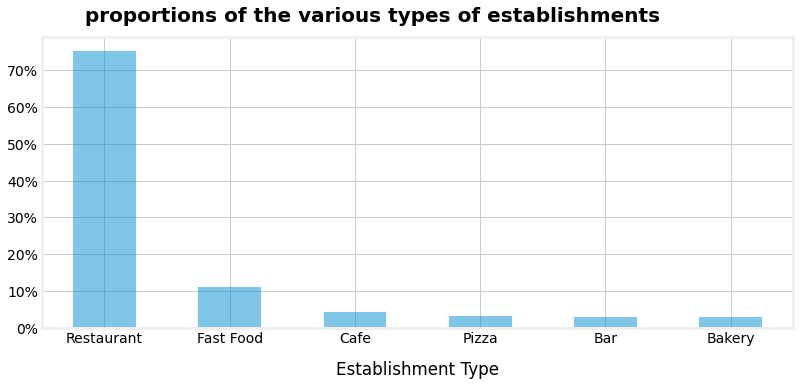

In [14]:
#plot
fig,ax =plt.subplots(facecolor='white')
establishment_proportion.plot(kind='bar',
                                   figsize=(12, 5),
                                   rot=0,
                                   alpha=.5)
ax.set_facecolor("white")

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.ylabel('',labelpad=15)
plt.xlabel('Establishment Type',labelpad=15)
plt.title("proportions of the various types of establishments",
          fontweight='semibold' ,
          fontsize=20,
          x=.44,
          pad=15)

plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I really like color and fontsize. Very beautiful
</div>

Roughly 75% of establishments in LA are restaurants with fast food being the next most common type of establishment Cafe the company's planned venue makes up 5% of establishments in LA.

### Investigate the proportions of chain and nonchain establishments. Plot a graph.


In [15]:
proportion_chain = rest_data_us['chain'].value_counts(normalize=True) * 100
proportion_chain

False    61.879598
True     38.120402
Name: chain, dtype: float64

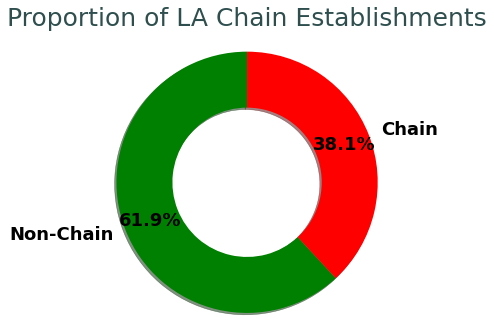

In [16]:
#plot
fig, ax = plt.subplots(facecolor='white')

patches, texts, autotexts = plt.pie(proportion_chain,
                                    labels=['Non-Chain', 'Chain'],
                                    labeldistance=1.1,
                                    shadow=True,
                                    colors=['green', 'red'],
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },wedgeprops=dict(width=0.6),
                                     startangle=90,
                                    pctdistance=0.80,
                                    radius=1.4)

    
plt.title("Proportion of LA Chain Establishments",
          pad=40,
          size=25,
          x=.5,
          color='darkslategray',
          fontname='sans-serif')

plt.show()

Non-chains  representing 2/3 of the LA establishments. Knowing the share of LA restaurants .

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good that you use pie chart here
</div>

### Which type of establishment is typically a chain?


In [17]:
establishment_chain_proportion = rest_data_us.pivot_table(index='object_type',
                                                values='chain').sort_values(
                                                    'chain', ascending=False)
establishment_chain_proportion


,chain
object_type,
Bakery,1.000000
Cafe,0.611494
Fast Food,0.567542
Pizza,0.481250
Restaurant,0.316196
Bar,0.263699


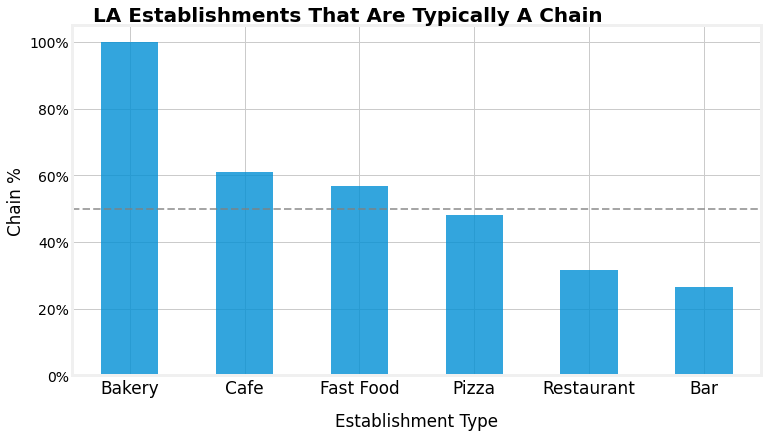

In [18]:
#plot
fig, ax = plt.subplots(figsize=(11, 6), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_chain_proportion.plot(kind='bar',
                                    rot=0,
                                    ax=ax,
                                    alpha=.8,
                                    legend=False)
plt.axhline(.5, xmin=0, linewidth=2, linestyle='--', alpha=.7, color='gray')


#tick 
ax.tick_params(axis='x', labelsize=17)
ax.yaxis.set_major_formatter(PercentFormatter(1))


#labels
plt.xlabel("")
plt.xlabel('Establishment Type',labelpad=15)
plt.ylabel('Chain %')
plt.title("LA Establishments That Are Typically A Chain",
          fontsize=20,
          x=.40,
          pad=0,
          fontweight='semibold')

plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good again
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

But let's add yticks (percents), please
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Perfect now!
</div>

Restaurants are less likely to be a chains; this is likely the reason why non-chains were well represented in the pie chart earlier. Of special consideration, is the company's  Cafes, and to be a chain rather than a non-chain.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [19]:
#series with # of seats for all chain establishments
chain_seat_num = rest_data_us[rest_data_us['chain'] == True]['number']
chain_seat_num.head(10)

8       1
10     38
11     17
12    133
14     26
15     21
24     43
27     80
29     15
31    118
Name: number, dtype: int64

In [20]:
chain_seat_num.agg('mode')
chain_seat_num.describe()

count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

In [21]:
print("Less than or Equal to 49:",
      chain_seat_num[chain_seat_num <= 49].sort_values().tail(10).values)

print("Greater than 49:",
      chain_seat_num[chain_seat_num > 49].sort_values().head(10).values)

Less than or Equal to 49: [49 49 49 49 49 49 49 49 49 49]
Greater than 49: [61 61 61 62 62 62 62 62 62 62]


 To get a clearer view of how the establishment types differ among the seats,we splited them into two categories: "few <50" and "many>50" 


In [22]:
rest_data_us['seat'] = rest_data_us['number'].apply(
    lambda x: 'few' if x < 50 else 'many')
rest_data_us['seat'].head()

0    few
1    few
2    few
3    few
4    few
Name: seat, dtype: object

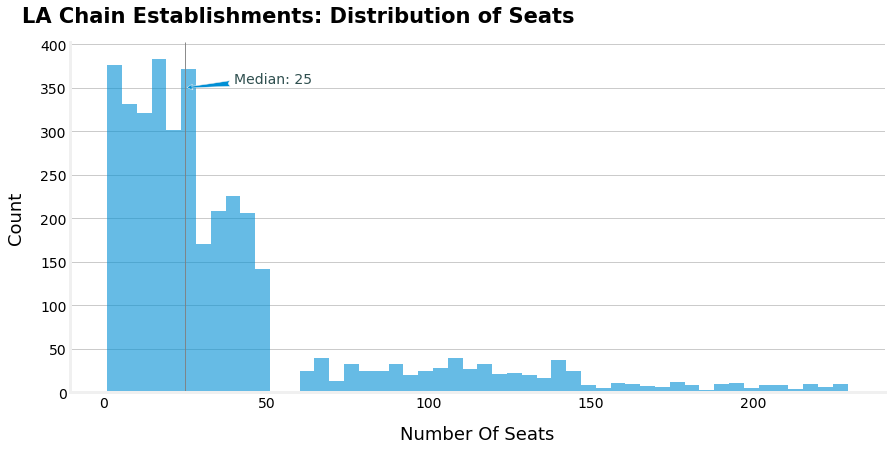

In [23]:
#plot
fig, ax = plt.subplots(figsize=(13,6), facecolor='white')
ax.set_facecolor("xkcd:white")
plt.hist(chain_seat_num, alpha=.6, bins=50)

#shading and median

plt.axvline(chain_seat_num.median(), color='gray', linewidth=.9)


#annotate, despine, and grid
plt.annotate("Median: " + str(int(chain_seat_num.median())),
             xy=(25, 350),
             xytext=(40, 355),
             color='darkslategray',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()
plt.grid(False, axis='x')

#labels
plt.title("LA Chain Establishments: Distribution of Seats",
          fontsize=21,
          x=.28,
          pad=20,
          fontweight='bold')
plt.xlabel('Number Of Seats', labelpad=15, fontsize=18)
plt.ylabel('Count', labelpad=15, fontsize=18)

plt.show()


In [24]:
rest_data_us[rest_data_us['chain'] == True]['seat'].value_counts(normalize=True)


few     0.825224
many    0.174776
Name: seat, dtype: float64

Considering the proportionfor the "many seats" category, indicating that the chain establishments are characterized by a few establishments with a lot of seats.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good
</div>

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [25]:
avg_seat_establishment = rest_data_us.pivot_table(index='object_type',
                                        values='number',
                                        margins=True,
                                        aggfunc='mean')
avg_seat_establishment.head()

,number
object_type,
Bakery,21.773852
Bar,44.767123
Cafe,25.000000
Fast Food,31.837711
Pizza,28.459375


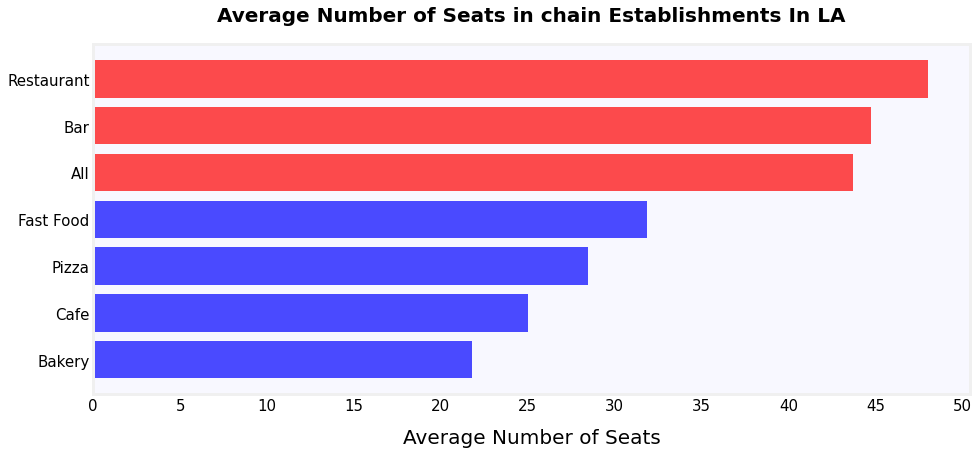

In [26]:
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")
avg_seat_establishment = rest_data_us.pivot_table(index='object_type',
                                        values='number',
                                        margins=True,
                                        aggfunc='mean')
color = [
    'red' if int(i) > 40 else 'blue'
    for i in avg_seat_establishment.sort_values('number').values]

ax.barh(avg_seat_establishment.sort_values('number').index,
        avg_seat_establishment.sort_values('number')['number'],
        color=color,
        alpha=.7)

ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))


plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.4)

plt.xlabel("Average Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("", labelpad=10, fontsize=20)
plt.title(
    "Average Number of Seats in chain Establishments In LA",
    
    pad=23,
    size=20,
    ha='center',
    fontweight='semibold')

plt.show()

Restaurant and bar establishments containing a larger share of "many seats" relative to the other establishments.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great
</div>

#### which type of restaurant has the greatest number of seats

In [27]:
rest_data_us.query("object_type not in ['Restaurant']")['seat'].value_counts(
    normalize=True) * 100

few     89.190317
many    10.809683
Name: seat, dtype: float64

In [28]:
rest_data_us.query("object_type in ['Restaurant']")['seat'].value_counts(
    normalize=True) * 100

few     76.154376
many    23.845624
Name: seat, dtype: float64

 9% of establishments with a relatively low avg. seat count contain many seats. In comparison, those with a high avg count, Restaurants, have more than double that proportion around 23% of establishments with many seats

### Put the data on street names from the address column in a separate column.


In [29]:
ending_Ofinterest = ['BLVD','ST','AVE','RD','DR','WAY']


In [30]:
extra=['WORLD WAY', 'W SUNSET BLVD', 'ECHO PARK AVE', 'NATIONAL BLVD', 'W 6TH ST STE', 'N CAHUENGA BLVD', 'S WESTERN AVE STE', 'WILSHIRE BLVD', 'S OXFORD AVE', 'MELROSE AVE', 'WALL ST STE', 'S SAN VICENTE BLVD', 'S INDIANA ST', 'N LA CIENEGA BLVD', 'W 3RD ST', 'S ALVARADO ST STE 111C', 'WALL ST', 'S WESTERN AVE', 'W SUNSET BLVD STE', 'GLENDALE BLVD', 'N FIGUEROA ST', 'W PICO BLVD', 'WORLD WAY LVL6 SP5', 'W OLYMPIC BLVD', 'S FLOWER ST STE B420', 'N VINE ST', 'W 5TH ST', 'S HOPE ST', 'HOLLYWOOD BLVD', 'KNOX AVE', 'AIRPORT BLVD', 'S FLOWER ST B-270', 'MARIACHI PLZ', 'ROSWELL ST', 'FRANKLIN AVE', 'S FLOWER ST', 'WORLD WAY 7C', 'W OLYMPIC BLVD STE', 'S GRAND AVE', 'S FLOWER ST B-15', 'WORLD WAY S4', 'E OLYMPIC BLVD', 'PASADENA AVE', 'WORLD WAY T81', 'WORLD WAY 5TH FLR', 'N GLENDALE BLVD', 'HOLLYWOOD BLVD -221', 'HOLLYWOOD BLVD STE', 'AVION DR', 'W MANCHESTER AVE LOS', 'E 11TH ST', 'CAHUENGA BLVD W', 'S FIGUEROA ST LBBY LOBBY', 'N FAIRFAX AVE STE', 'BEVERLY BLVD', 'W MANCHESTER AVE', 'COLORADO BLVD STE', 'W SUNSET BLVD A120', 'WESTWOOD PLZ', 'WESTWOOD PLZ A233B', 'W CHICK HEARN CT', 'W 6TH ST', 'WORLD WAY T38', 'LOS FELIZ BLVD STE', 'E 7TH ST', 'WORLD WAY T48', 'E CESAR E CHAVEZ AVE', 'PORTER ST', 'S NORMANDIE AVE', 'GAYLEY AVE', 'S SOTO ST', 'E 59TH ST', 'SUNSET BLVD', 'W SLAUSON AVE', 'WILSHIRE BLVD STE A3-A5', 'W 8TH ST', 'E 4TH ST', 'N LA BREA AVE', 'SOTO ST STE', 'S SEPULVEDA BLVD', 'WHITTIER BLVD', 'S VERMONT AVE', 'W 6TH ST 2B', 'W 87TH ST', 'DIVISION ST', 'S FIGUEROA ST STE 418A', 'S CENTRAL AVE', 'WABASH AVE', 'S BROADWAY', 'CRENSHAW BLVD', 'S NEW HAMPSHIRE AVE F1', 'S SERRANO AVE', 'S FIGUEROA ST 35TH', 'W 6TH ST A', 'LA PUERTA ST', 'W CENTURY BLVD', 'S LA BREA AVE', 'SANTEE ST', 'WILSHIRE BLVD STE I', 'LINCOLN BLVD', 'S IROLO ST STE', 'W 7TH ST', 'W TEMPLE ST']

In [31]:
def filters(extra):
    new= []
    y=extra.split(' ')
    for i in y:
        if i in ending_Ofinterest and i != 'STE': 
            new.append(i)
            return " ".join(new)
        elif i == 'STE':
            return " ".join(new)
        new.append(i)
    return " ".join(new)
                

In [32]:
def get_street(x):
    split_address = x.replace("#", "").replace("/", "").split()
    new = []
    for i in split_address:
        if i.isdigit():
            continue
        else:
            new.append(i)
    return ' '.join(new)

In [33]:
rest_data_us['street'] = rest_data_us['address'].apply(
    lambda x: get_street(x)).apply(lambda x: filters(x))

In [34]:
rest_data_us.head()

,id,object_name,address,chain,object_type,number,seat,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,few,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,few,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,few,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,few,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,few,ECHO PARK AVE


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very interesting way)
</div>

### Plot a graph of the top ten streets by number of restaurants.


In [35]:
only_restaurant = rest_data_us[rest_data_us['object_type'] == 'Restaurant']

In [36]:
only_restaurant.head()

,id,object_name,address,chain,object_type,number,seat,street
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,few,WORLD WAY
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,few,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,few,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,few,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,many,WORLD WAY


In [37]:
only_restaurant['street'] = only_restaurant['address'].apply(
    lambda x: get_street(x)).apply(lambda x: filters(x))

In [38]:
only_restaurant['street'].value_counts().head()


WILSHIRE BLVD     309
W SUNSET BLVD     271
W PICO BLVD       257
S WESTERN AVE     219
W OLYMPIC BLVD    205
Name: street, dtype: int64

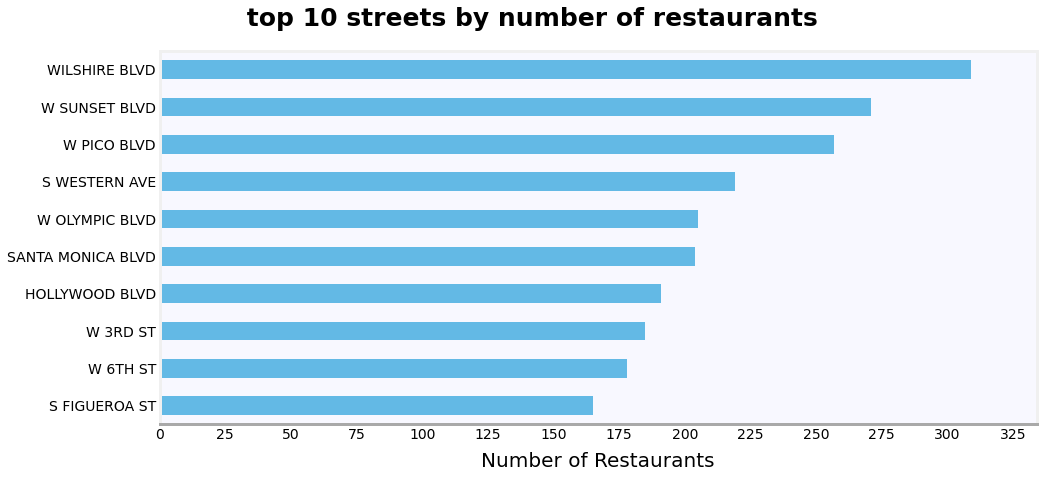

In [39]:
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")
only_restaurant['street'].value_counts().head(10).sort_values().plot.barh(figsize=(14,6.4),
                                                         rot=0,
                                                         alpha=.6)

plt.xlim(0,only_restaurant['street'].value_counts().max()+25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('Number of Restaurants',labelpad=10,size=20)
plt.title(" top 10 streets by number of restaurants",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

These streets contain  up to ~325 restaurants establishments! They may be of interest for the company if they want to enter a competitive but thriving market

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

All right here
</div>

### Find the number of streets that only have one restaurant.


In [40]:
print('Count (All):', len(only_restaurant['street'].value_counts()))
print(
    '1 restaurant (Count):',
    len(only_restaurant['street'].value_counts()[
        only_restaurant['street'].value_counts() == 1]))
print(
    '1 Restaurant (%):',
    len(only_restaurant['street'].value_counts()[
        only_restaurant['street'].value_counts() == 1]) /
    len(only_restaurant['street'].value_counts()))


Count (All): 723
1 restaurant (Count): 348
1 Restaurant (%): 0.48132780082987553


Out of  the 723 streets 348 or 48% of them contain only one of such establishment.

### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

First we'll want to segment the streets into two: few and many restaurants.Let's look at the distribution first to help in defining "a lot" of restaurants.



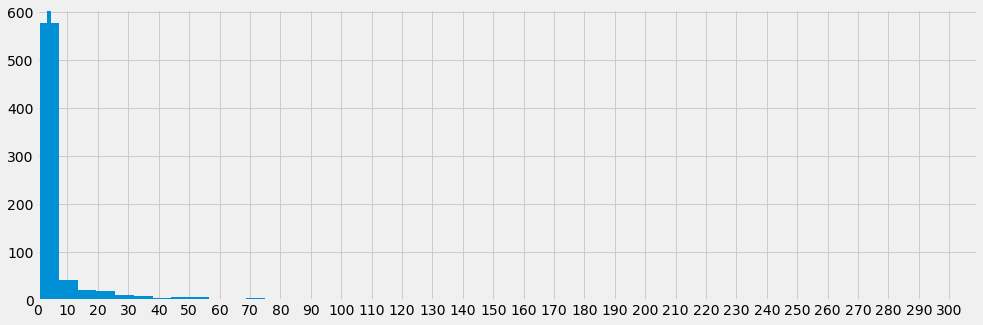

In [41]:
ax=only_restaurant['street'].value_counts().hist(bins=50,figsize=(15,5))
plt.axvline(only_restaurant['street'].value_counts().quantile(.68))
plt.xlim(0, only_restaurant['street'].value_counts().max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Something went wrong here🤔
</div>

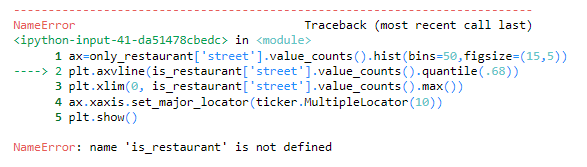

we'll choose 10 restaurants as a definition for "lots of" restaurants for a street.

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Good choice
</div>

In [42]:
street_more_than_10_restaurants = only_restaurant['street'].value_counts()[
    only_restaurant['street'].value_counts() > 10].index

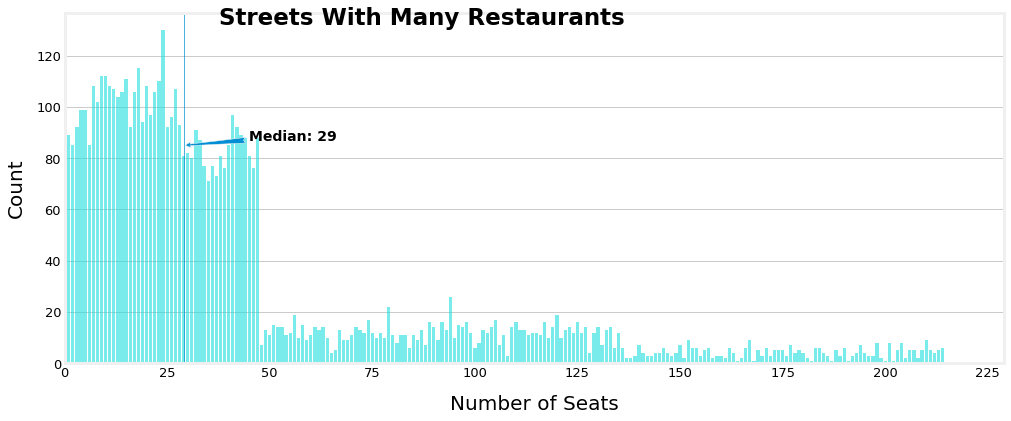

In [43]:
lots_restaurant_number_seats = only_restaurant.query(
    "street in @street_more_than_10_restaurants")['number']

fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
sns.countplot(lots_restaurant_number_seats, alpha=.6, color='cyan')
plt.axvline(lots_restaurant_number_seats.median(), alpha=.7, linewidth=1)
ax.set_facecolor("white")

freq = int(25)
xticks = ax.get_xticks()
ax.set_xticks(np.append(xticks[::25], lots_restaurant_number_seats.max() - 4))
ax.set_xticklabels(
    np.append(xticks[::25],
              lots_restaurant_number_seats.max() - 4))
plt.xlim(0, lots_restaurant_number_seats.max())
ax.tick_params(labelsize=13)

plt.annotate("Median: " + str(int(lots_restaurant_number_seats.median())),
             xy=(lots_restaurant_number_seats.median(), 85),
             xytext=(45, 87),fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))




plt.xlabel("Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("Count", labelpad=10, fontsize=20)
plt.title("Streets With Many Restaurants",
          fontsize=23,
          x=.38,
          y=.95,
          fontweight='semibold')
plt.show()

 WE can see here almost the same pattern seen in the overall number of seats distribution.



chain and non-chain establishments for streets with many restaurants.



In [44]:
is_over10restaurant_chain = only_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==True")
is_over10restaurant_non_chain = only_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==False")

In [45]:
chain_restaraunt_many_street = is_over10restaurant_chain['number']
non_chain_restaraunt_many_street = is_over10restaurant_non_chain['number']

In [46]:
chain_restaraunt_many_street.max(), non_chain_restaraunt_many_street.max()


(229, 229)

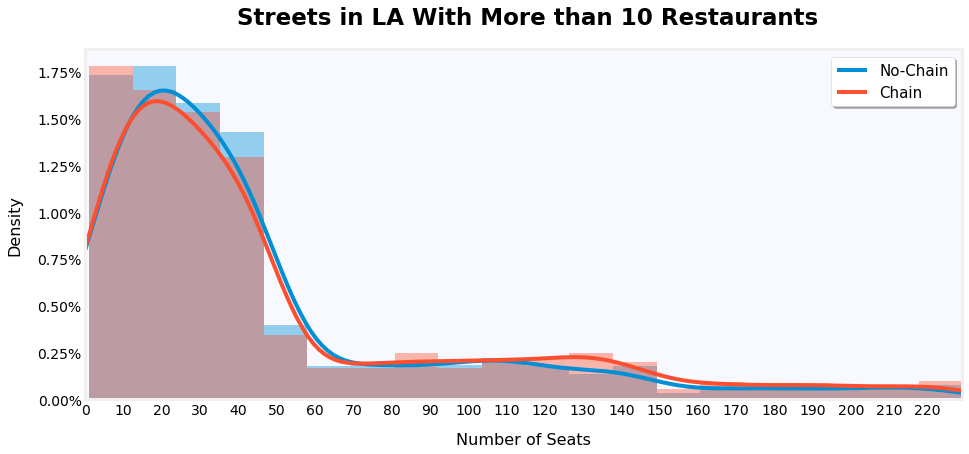

In [47]:
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")
sns.distplot(chain_restaraunt_many_street, bins=20)
sns.distplot(non_chain_restaraunt_many_street, bins=20)

def mjrFormatter(x, pos):
    return "{:.2f}%".format(x * 100)
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.4)
plt.xlim(0, chain_restaraunt_many_street.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

plt.legend(['No-Chain', 'Chain'], fancybox=True, shadow=True, fontsize=15,facecolor='white')

plt.xlabel('Number of Seats', labelpad=15, fontsize=16)
plt.ylabel('Density', labelpad=15, fontsize=16)
plt.title(
    " Streets in LA With More than 10 Restaurants",
    fontsize=23,
    pad=25,
    ha='center',
    fontweight='semibold')

plt.show()

  Chain Affiliation Makes No Difference in Distribution of Seats

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Thanks for the cool graph)
</div>

# Conclusion


- **LA Establishments:**
* Total count : 9,651
* 62% -> non-chains and 38& -> chains
* Two groups for chains:
* Few Seats (< 50) and Many seas (>61)

- **Café**
* Roughly 4.5% of the market share
* More likely to be a chain (61.1%) -> % set to continue increasing
* The smallest share of with CHAIN establishments with more than 61
* Chains:Roughly 25 avg. number of seats


- **Restaurant**
* Make up roughly 75% of the establishments in LA
* More likely to be non-chains (68.4%)
* CHAINS:
 * 1/5 or 20% have many seats(> 60)
 * Have on average 48 seats
* 48% of streets contain 1 restaurant whilst 52% contain more than 1; top 10 streets contain between 160 and 320 restaurants.
 * Streets with more than 10 restaurants
 * Have a median of 32 seats
 * Distribution of seats can be split into two groups and does not differ amongst chains and non-chain restaurant establishments.

* The company should t think towards establishing a restaurant as there is less big players (chains) in that market relative to Cafes; small Cafes are being outnumbered  by Cafe chains.
* Large share of establishments in LA, especially considering their high % of non-chain establishments make it relatively easier to compete and thrive given the service it will provide.
* The company should consider starting off as a non-chain with 48 seats and depending on its strategy, establish itself in a street with many restaurants and/or one restaurant. It can then aggressively grow and establish a chain thereafter given the novelty of service provided.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I like your informative conclusion. It's awesome!
</div>

##  Preparing a presentation

Presentation: <https://drive.google.com/file/d/1Qu4dDIpiLZXkBpUkrGOZN9azAJr3_ZFP/view?usp=sharing> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It is very beautiful. I like colors and style. Special thanks for the recomendations👍
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's conclusion</b> <a class="tocSkip"></a>

Dima, you did really good job. I can see that you have nice knowledge in the data visualization and presentations. Awesome!
</div>